In [110]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [122]:
data = pd.read_csv("../data/csv_data_keylogger.csv")

data['key_code'] = data['key_code'].dropna()
data['timing_ms'] = data['timing_ms'].dropna()
data['absolut_ms'] = data['absolut_ms'].dropna()
data = data.loc[data['key_code'] != "key_code"]
data = data.loc[data['key_code'] != " "]
data = data.loc[data['timing_ms'] != " "]
data = data.loc[data['absolut_ms'] != " "]
data = data.loc[data['key_code'] != "LBUTTON"]
data = data.loc[data['key_code'] != "RBUTTON"]
data = data.loc[data['key_code'] != "MBUTTON"]

for i in range(len(data)):
    data.iloc[i,1] = int(data.iloc[i,1])

In [123]:
for i in range(len(data)):
    data.iloc[i,2] = int(data.iloc[i,2])
data['absolut_ms'] = data['absolut_ms'] - min(data['absolut_ms'])

data = data[np.array(data['timing_ms']) < 1000.0]
data.head()

,key_code,timing_ms,absolut_ms,coord_X,coord_Y
3,e,156,195,NaN,NaN
4,s,859,1080,NaN,NaN
5,t,328,1444,NaN,NaN
6,NaN,344,1817,NaN,NaN
7,D,844,2684,NaN,NaN


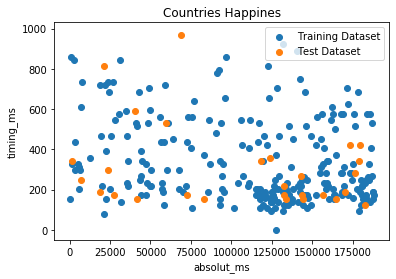

In [124]:
train_data = data.sample(frac=0.9)
test_data = data.drop(train_data.index)
x_train = train_data['absolut_ms'].values
y_train = train_data['timing_ms'].values
x_test = test_data['absolut_ms'].values
y_test = test_data['timing_ms'].values

plt.scatter(x_train, y_train, label='Training Dataset')
plt.scatter(x_test, y_test, label='Test Dataset')
plt.ylabel('timing_ms')
plt.xlabel('absolut_ms')
plt.title('Countries Happines')
plt.legend()
plt.show()

In [125]:
reg = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
coef = reg.coef_
intercept = reg.intercept_
func_x = [i for i in range(int(min(x_train))-50,int(max(x_train))+50,1)]
func_y = coef * func_x + intercept

pred = reg.predict(x_test.reshape(-1, 1))

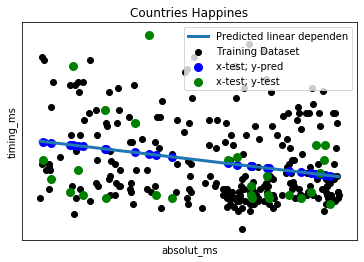

coef_:       -0.0009381318858587354 
intercept_:  439.70130618439634


In [126]:
plt.plot(func_x, func_y, linewidth=3, label='Predicted linear dependen')
plt.scatter(x_train, y_train, color='black', label='Training Dataset')
plt.scatter(x_test, pred, color='blue', linewidth=3, label='x-test; y-pred')
plt.scatter(x_test, y_test, color='green', linewidth=3, label='x-test; y-test')

plt.xticks(())
plt.yticks(())
plt.ylabel('timing_ms')
plt.xlabel('absolut_ms')
plt.title('Countries Happines')
plt.legend()
plt.show()

print("coef_:      ", coef[0], "\nintercept_: ", intercept)